#Sentiment analysis Classifier

In [3]:
import pandas as pd 

spotify = pd.read_csv('reviews.csv') #spotify app reviews
spotify = spotify[['Review', 'Rating']] 

negative = spotify[spotify['Rating'] < 3]
positive = spotify[spotify['Rating'] > 4.80]
print("size del dataset antes del random sample:\n","negativo", len(negative), "positivo", len(positive)) #46,865

#filtrando las filas que quiero, excluyendo los puntajes de 3 a 4.79
filter = (spotify['Rating'] < 3) | (spotify['Rating'] >= 4.80)
spotify = spotify[filter] # despues del filtro 53752

size del dataset antes del random sample:
 negativo 24771 positivo 22095


In [4]:
# etiquetando los puntajes en positivo y negativo, agregando la columna sentiment
spotify["sentiment"] = spotify["Rating"].map(lambda x: "positive" if x >= 4.80 else "negative")

negative    24771
positive    22095
Name: sentiment, dtype: int64


<AxesSubplot:>

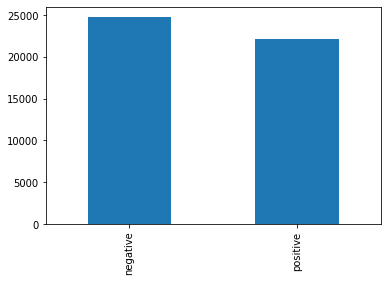

In [5]:
#inspeccionando el la distribución
from matplotlib.pyplot import plot as plt
#plt.style.use('seaborn')  #si se va a cargar el doc desde el principio, comentar esta parte primero y después uncomment and run
print(spotify["sentiment"].value_counts())
spotify["sentiment"].value_counts().plot.bar()

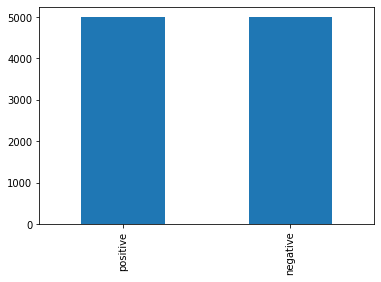

In [6]:
#arreglando la distribución
neg = spotify[spotify['sentiment'] == 'negative'].sample(5000)
pos = spotify[spotify['sentiment'] == 'positive'].sample(5000)
spotify = pd.concat([pos, neg])
spotify["sentiment"].value_counts().plot.bar()
spotify = spotify.sample(frac=1).reset_index(drop=True) #desorganizando las filas

In [7]:
# importing libraries for preproccessing and declaring variables
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download([
    "stopwords",
    "names",
    "vader_lexicon",
    "punkt",
    "wordnet",
    "omw-1.4"])
stopwords = nltk.corpus.stopwords.words("english")
other_stops = ENGLISH_STOP_WORDS.union(['aaaa','ab', 'yr', 'yrr', 'moto',  'aajata', 'abd'])
#stopwords = stopwords.
names = nltk.corpus.names.words()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
#preproccessing data
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

spotify['Review'] = spotify['Review'].str.lower()
spotify['Review'] = spotify['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
spotify['Review'] = spotify['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in names]))
spotify['Review'] = spotify['Review'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
spotify['Review'] = spotify['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in other_stops]))
spotify['Review'] = spotify['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [9]:
spotify

,Review,Rating,sentiment
0,know curate music like maybe enjoy song heard ...,1,negative
1,positive search right increase volume sharply ...,5,positive
2,overall amazing using pretty good guy make spo...,5,positive
3,love premium version day gat premium hope fix ...,1,negative
4,best app song choose according mood save requi...,5,positive
...,...,...,...
9995,word amazing love think download app spotify,5,positive
9996,log account day try play music play open playl...,1,negative
9997,best music app used spend buck month cd best a...,5,positive
9998,despite paying subscription offline playlist d...,2,negative


In [10]:
#training the model, splitting data
from sklearn.model_selection import train_test_split
X = spotify['Review'].values
y = spotify['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=4) #test_size = 35% , train_size = 65%   

print(len(X_train), len(X_test), len(y_train), len(y_test))

6500 3500 6500 3500


In [11]:
#vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1, 1), min_df= 0.01, binary = False, norm = 'l2') #binary = false, norm = l2 estan por default cuando se inicializa el vectorizer
X_train_vectorized = vect.fit_transform(X_train)
X_test_vectorized = vect.transform(X_test)

#observaciones: el modelo mejora cuando el permito los features que tienen low term frecuency, but if I set min_df = 0.1 its performance gets lower

In [12]:
X_df = pd.DataFrame(X_train_vectorized.toarray(), columns=vect.get_feature_names_out())
print(X_df)

          able  absolutely   access  account  actually   ad  add    adding  \
0     0.518831         0.0  0.61711      0.0       0.0  0.0  0.0  0.000000   
1     0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
2     0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
3     0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.660041   
4     0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
...        ...         ...      ...      ...       ...  ...  ...       ...   
6495  0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
6496  0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.721151   
6497  0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
6498  0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   
6499  0.000000         0.0  0.00000      0.0       0.0  0.0  0.0  0.000000   

         album   amazing  ...  want  way  week  wish  work  wor

In [13]:
#importing classifiers
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [14]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()}

In [15]:
#training and evaluating model and accuracy
from sklearn.metrics import accuracy_score
trained_classifiers = {}

for name, sklearn_classifier in classifiers.items():
     classifier = sklearn_classifier
     classifier.fit(X_train_vectorized, y_train)
     y_pred = classifier.predict(X_test_vectorized)
     accuracy = accuracy_score(y_test, y_pred)
     trained_classifiers[name] = classifier
     print(F"{accuracy:.2%} - {name}")

84.14% - BernoulliNB
85.51% - ComplementNB
85.40% - MultinomialNB
77.49% - KNeighborsClassifier
79.40% - DecisionTreeClassifier
85.26% - RandomForestClassifier
82.89% - AdaBoostClassifier


In [20]:
#predecting the sentiment in each classifier
for name, sklearn_classifier in trained_classifiers.items():
  classifier = sklearn_classifier
  new_text = "I had problem downlaoding the app"
  new_text_vectorized = vect.transform([new_text])
  new_sentiment = classifier.predict(new_text_vectorized)
  print("Sentiment:",new_sentiment, trained_classifiers[name])

Sentiment: ['positive'] BernoulliNB()
Sentiment: ['negative'] ComplementNB()
Sentiment: ['negative'] MultinomialNB()
Sentiment: ['positive'] KNeighborsClassifier()
Sentiment: ['negative'] DecisionTreeClassifier()
Sentiment: ['negative'] RandomForestClassifier()
Sentiment: ['negative'] AdaBoostClassifier()


#Infrastructure of the sentiment analysis

##Test and Train proportions

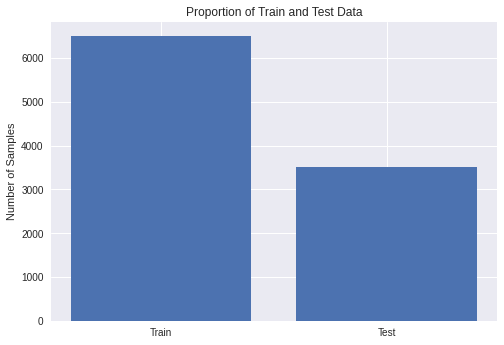

In [21]:
import matplotlib.pyplot as plt
#before the sample, original data size = 46,865 and after the sample: 10,000
#size of the dataset
dataset_size = 10000

train_size = len(X_train) #6,500 # size of the train 
test_size = dataset_size - train_size  #3,500 size of the test
plt.style.use('seaborn')
labels = ["Train", "Test"]
values = [train_size, test_size]
plt.bar(labels, values)
plt.title("Proportion of Train and Test Data")
plt.ylabel("Number of Samples")
plt.show()


##Matriz de confusión de los modelos

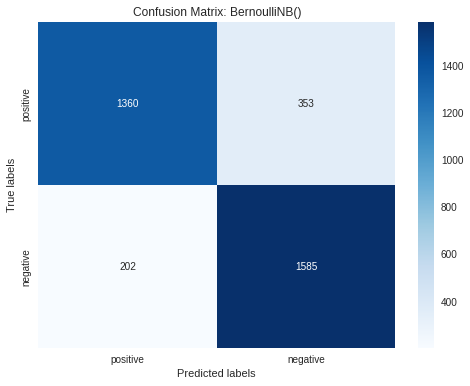

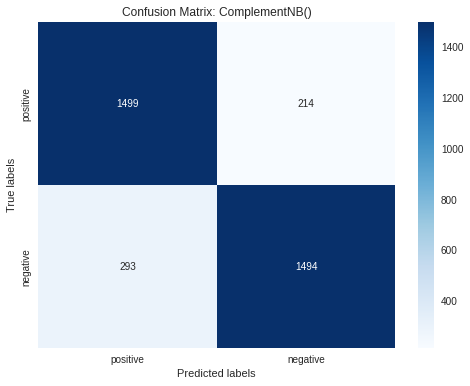

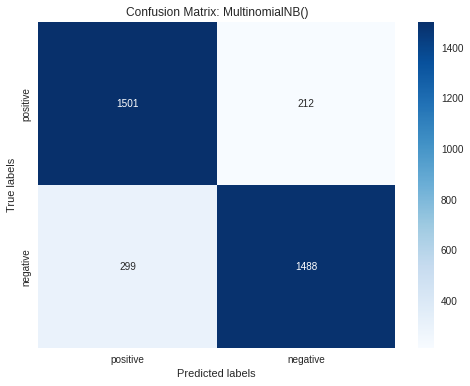

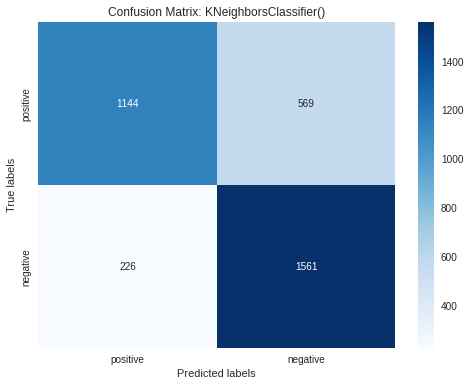

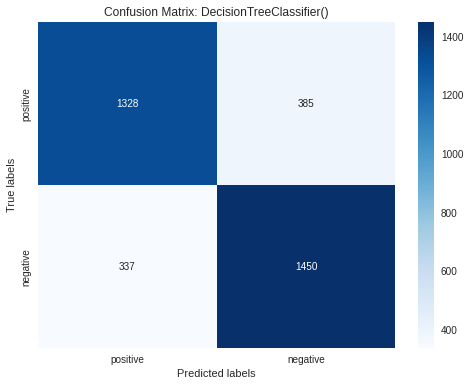

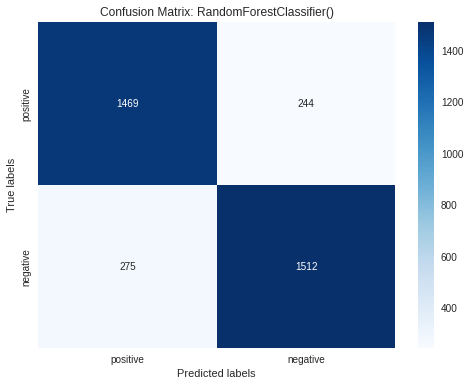

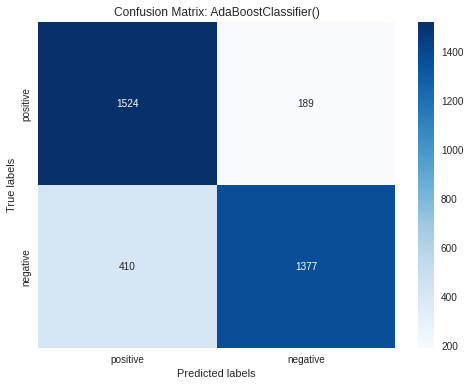

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, sklearn_classifier in trained_classifiers.items():
  classifier = sklearn_classifier

  classifier.fit(X_train_vectorized, y_train) #ajustando la data

  y_pred = classifier.predict(X_test_vectorized) #predicción
  
  # Calcular la matriz de confusión
  conf_mat = confusion_matrix(y_test, y_pred)  # 0 positivo, 1 negativo
  #labels
  labels = ['positive', 'negative']
  # Visualizar la matriz de confusión
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=True, xticklabels=labels, yticklabels=labels) 
  #'g' significa que los números se mostrarán en notación científica si son demasiado grandes o demasiado pequeños
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')

  ax.set_title('Confusion Matrix: {}'.format(trained_classifiers[name]))
  print("\n")
  plt.show()
